SVM_algorithm

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [3]:
feature_df = pd.read_csv(r"C:\Users\GHB\Desktop\SCREW PROJECT\Machine Learning\Features\tsfresh_efficient_features.csv")
print(feature_df)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\GHB\\Desktop\\SCREW PROJECT\\Machine Learning\\Features\\tsfresh_efficient_features.csv'

In [18]:
# Assume that labels are in a separate dataframe
feature_df = feature_df.rename(columns={'Unnamed: 0': 'id'})
labels = pd.read_csv(r"C:\Users\GHB\Desktop\SCREW PROJECT\Machine Learning\Data\Labels_names.csv")
labels = labels.rename(columns={'File Name': 'id'})

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Fit the encoder and transform the labels
labels['Label'] = encoder.fit_transform(labels['Label'])

# Print original labels and their encoded values
for original, encoded in zip(encoder.classes_, range(len(encoder.classes_))):
    print(f'Original: {original}, Encoded: {encoded}')

# Merge features and labels
data = pd.merge(feature_df, labels, on='id')

print(data)

Original: N, Encoded: 0
Original: NS, Encoded: 1
Original: OT, Encoded: 2
Original: P, Encoded: 3
Original: UT, Encoded: 4
                  id  Angle (deg)__variance_larger_than_standard_deviation  \
0     id030520234000                                                1.0      
1     id030520234001                                                1.0      
2     id030520234002                                                1.0      
3     id030520234003                                                1.0      
4     id030520234004                                                1.0      
...              ...                                                ...      
1336  id280420233082                                                1.0      
1337  id280420233083                                                1.0      
1338  id280420233084                                                1.0      
1339  id280420233085                                                1.0      
1340  id28042023308

In [4]:
nan_columns = data.isna().any()
nan_cols_list = data.columns[data.isna().any()].tolist()

print(nan_columns)
print(nan_cols_list)

id                                                                False
Angle (deg)__variance_larger_than_standard_deviation              False
Angle (deg)__has_duplicate_max                                    False
Angle (deg)__has_duplicate_min                                    False
Angle (deg)__has_duplicate                                        False
                                                                  ...  
Torque (Nm)__permutation_entropy__dimension_6__tau_1              False
Torque (Nm)__permutation_entropy__dimension_7__tau_1              False
Torque (Nm)__query_similarity_count__query_None__threshold_0.0     True
Torque (Nm)__mean_n_absolute_max__number_of_maxima_7              False
Label                                                             False
Length: 9326, dtype: bool
['Angle (deg)__query_similarity_count__query_None__threshold_0.0', 'Current (V)__friedrich_coefficients__coeff_0__m_3__r_30', 'Current (V)__friedrich_coefficients__coeff_1__m_3__r_30

In [47]:
print(feature_df['Current (V)__friedrich_coefficients__coeff_0__m_3__r_30'])

0      -1.219270
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1336   -0.226149
1337   -0.319877
1338   -0.798902
1339   -0.381024
1340   -0.339891
Name: Current (V)__friedrich_coefficients__coeff_0__m_3__r_30, Length: 1341, dtype: float64


In [19]:
# Droping the NaN Columns
data = data.dropna(axis=1)

In [20]:
# Drop filename column (we don't need it for the model)
data = data.drop(columns='id')

# Separate features and labels
X = data.drop(columns='Label')
y = data['Label']

In [21]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
# Create a SVM model with a radial basis function (RBF) kernel
svm_model = SVC(kernel='rbf')

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.91      0.72       129
           1       0.00      0.00      0.00        45
           2       0.43      1.00      0.60        87
           3       0.00      0.00      0.00        45
           4       0.00      0.00      0.00        97

    accuracy                           0.51       403
   macro avg       0.20      0.38      0.26       403
weighted avg       0.28      0.51      0.36       403



G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN algorithm

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [12]:
# Creating the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=5)

# Training the KNN classifier on the training data
knn.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluating the KNN classifier's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       129
           1       0.51      0.67      0.58        45
           2       0.85      0.87      0.86        87
           3       0.55      0.49      0.52        45
           4       0.94      0.84      0.89        97

    accuracy                           0.81       403
   macro avg       0.75      0.76      0.75       403
weighted avg       0.82      0.81      0.81       403



G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

k=1, accuracy=83.13%
k=2, accuracy=81.64%


G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

k=3, accuracy=81.89%
k=4, accuracy=81.89%


G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k=5, accuracy=81.14%


G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

k=6, accuracy=82.63%
k=7, accuracy=81.39%


G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

k=8, accuracy=81.64%
k=9, accuracy=81.14%


G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

k=10, accuracy=80.65%
k=11, accuracy=80.40%


G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

k=12, accuracy=81.64%
k=13, accuracy=81.14%


G:\PROGRAMI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k=14, accuracy=81.89%
k=1 achieved highest accuracy of 83.13% on test data


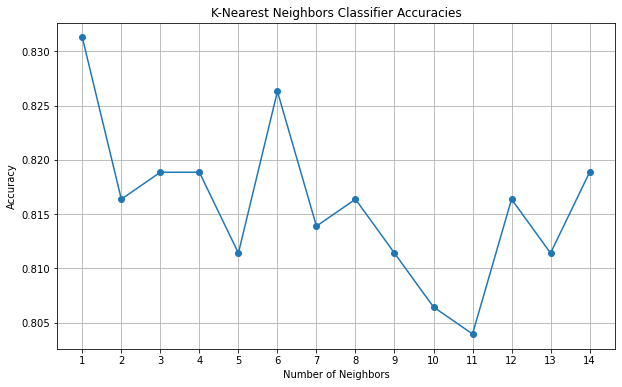

In [14]:
# Initialize the values of k for our k-Nearest Neighbor classifier along with the

import matplotlib.pyplot as plt
# list of accuracies for each value of k
neighbors = list(range(1, 15))
accuracies = []

# Loop over various values of `k` for the k-Nearest Neighbor classifier
for k in neighbors:
    # Train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # Evaluate the model and update the accuracies list
    score = model.score(X_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

# Find the value of k that has the largest accuracy
i_max = accuracies.index(max(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on test data" % (neighbors[i_max],
                                                                 accuracies[i_max] * 100))

# Plot the relationship between the number of neighbors and the accuracy of the classifier
plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracies, marker='o')
plt.title('K-Nearest Neighbors Classifier Accuracies')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid()
plt.show()

Random forrest


In [22]:
# Define the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))


# Evaluate the model's performance
print(classification_report(y_test, y_pred))

Accuracy: 0.9751861042183623
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       119
           1       0.98      0.98      0.98        43
           2       0.98      0.96      0.97        96
           3       0.98      0.98      0.98        52
           4       0.96      0.98      0.97        93

    accuracy                           0.98       403
   macro avg       0.98      0.98      0.98       403
weighted avg       0.98      0.98      0.98       403



In [26]:
from sklearn.model_selection import cross_val_score
import numpy as np
# Perform cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores: ", cross_val_scores)
print("Mean cross-validation score: ", np.mean(cross_val_scores))

# Fit the model on the full data
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns.tolist()
features = feature_names

# Create a DataFrame to view features and their importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

print(importance_df)

Cross-validation scores:  [0.95910781 0.94402985 0.92537313 0.98880597 0.89925373]
Mean cross-validation score:  0.9433140986517229
                                                Feature  Importance
0     Angle (deg)__variance_larger_than_standard_dev...    0.000000
1                        Angle (deg)__has_duplicate_max    0.000000
2                        Angle (deg)__has_duplicate_min    0.000000
3                            Angle (deg)__has_duplicate    0.000000
4                               Angle (deg)__sum_values    0.000000
...                                                 ...         ...
9229  Torque (Nm)__permutation_entropy__dimension_4_...    0.000000
9230  Torque (Nm)__permutation_entropy__dimension_5_...    0.000018
9231  Torque (Nm)__permutation_entropy__dimension_6_...    0.000000
9232  Torque (Nm)__permutation_entropy__dimension_7_...    0.000000
9233  Torque (Nm)__mean_n_absolute_max__number_of_ma...    0.003087

[9234 rows x 2 columns]


In [27]:
# Calculate the mean feature importance
mean_importance = importance_df['Importance'].mean()

# Print the features with an importance greater than the mean
important_features = importance_df[importance_df['Importance'] > mean_importance]
print(important_features)

                                                Feature  Importance
15                                Angle (deg)__skewness    0.001856
16                                Angle (deg)__kurtosis    0.002327
18                 Angle (deg)__absolute_sum_of_changes    0.003015
33                        Angle (deg)__absolute_maximum    0.000187
194          Angle (deg)__ar_coefficient__coeff_1__k_10    0.002082
...                                                 ...         ...
9212             Torque (Nm)__ratio_beyond_r_sigma__r_5    0.003836
9218         Torque (Nm)__lempel_ziv_complexity__bins_2    0.004051
9227             Torque (Nm)__fourier_entropy__bins_100    0.001990
9228  Torque (Nm)__permutation_entropy__dimension_3_...    0.000263
9233  Torque (Nm)__mean_n_absolute_max__number_of_ma...    0.003087

[526 rows x 2 columns]
